In [1]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
from datetime import time

In [2]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
with open("bostonmarathon-master/results/2014/results.pkl", 'rb') as f:
    data = pickle.load(f)
marathon = pd.DataFrame.from_dict(data).transpose()

In [4]:
marathon.head()

,10k,20k,25k,30k,35k,40k,5k,age,bib,city,...,ctz,division,gender,genderdiv,half,name,official,overall,pace,state
35540,0:58:22,2:01:01,2:42:47,3:21:59,4:07:49,4:45:17,0:29:52,30,35540,New York,...,CHN,5258,M,15604,2:08:38,"Zheng, Jiewu",5:06:24,27767,0:11:42,NY
35541,0:57:18,1:53:23,2:21:10,2:49:51,3:18:27,3:46:28,0:29:16,37,35541,Brunswick,...,,3767,F,6676,1:59:27,"Harrington, Kim L.",3:58:20,17647,0:09:06,OH
35542,1:02:28,2:15:31,2:57:57,3:36:45,4:12:27,4:56:56,0:31:03,37,35542,Boston,...,,5385,M,15885,2:24:34,"Gupta, Alok",5:12:24,28283,0:11:55,MA
35543,0:51:05,1:44:33,2:17:28,2:55:33,3:37:50,4:15:28,0:26:08,45,35543,Dorchester,...,,2445,M,13736,1:50:49,"Higgins, David J.",4:32:38,23843,0:10:24,MA
35544,1:19:19,2:47:08,-,4:30:17,5:21:07,6:08:52,0:40:21,22,35544,Waquoit,...,,6882,F,14150,2:57:27,"Bohnenberger, Helen",6:28:10,31567,0:14:49,MA


In [5]:
times = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half', 'official', 'pace']
for time in times:
    marathon[time] = pd.to_timedelta(marathon[time])
    marathon[time] = marathon[time].dt.seconds

In [6]:
marathon['gender'] = np.where(marathon['gender'] == 'F', 0, 1)

In [7]:
marathon[['age', 'division', 'genderdiv', 'overall']] = marathon[['age', 'division', 'genderdiv', 'overall']].apply(pd.to_numeric, errors='coerce')

In [8]:
marathon.dtypes

10k           int64
20k           int64
25k           int64
30k           int64
35k           int64
40k           int64
5k            int64
age           int64
bib          object
city         object
country      object
ctz          object
division      int64
gender        int32
genderdiv     int64
half          int64
name         object
official      int64
overall       int64
pace          int64
state        object
dtype: object

In [9]:
marathon.select_dtypes(include=['object']).nunique()

bib        31984
city        5935
country       78
ctz           85
name       31915
state         69
dtype: int64

In [10]:
marathon.drop(['bib', 'city', 'country', 'ctz', 'name', 'state'], 1, inplace=True)

In [11]:
# target variable
time = marathon.official

In [12]:
# marathon.drop(['official'], axis=1, inplace=True)

In [13]:
marathon.describe()

,10k,20k,25k,30k,35k,40k,5k,age,division,gender,genderdiv,half,official,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,3103.097674,6332.586481,7962.583792,9861.922618,11798.899544,13723.335136,1542.822786,42.407079,1932.563032,0.550807,8051.044741,6684.792052,14579.838544,15939.587825,556.537206
std,551.358657,1212.587624,1665.506781,2065.638168,2546.661658,2986.540264,266.826230,11.316496,1715.228694,0.497420,4754.005626,1301.574110,3138.025241,9232.978224,119.549132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.000000,0.000000,4836.000000,1.000000,185.000000
25%,2722.000000,5502.000000,6906.000000,8435.000000,10023.000000,11622.000000,1358.000000,33.000000,610.000000,0.000000,3972.000000,5805.000000,12331.750000,7943.750000,471.000000
50%,3019.000000,6126.000000,7720.000000,9462.000000,11287.000000,13127.000000,1505.000000,42.000000,1425.000000,1.000000,7970.000000,6466.500000,13942.000000,15939.500000,532.000000
75%,3429.000000,6989.000000,8853.250000,10967.250000,13207.000000,15444.250000,1707.250000,50.000000,2611.000000,1.000000,11968.000000,7382.000000,16394.250000,23935.250000,626.000000
max,6743.000000,13461.000000,17341.000000,22583.000000,26960.000000,30501.000000,5217.000000,81.000000,6979.000000,1.000000,17575.000000,14200.000000,32333.000000,31931.000000,1234.000000


In [14]:
marathon.head()

,10k,20k,25k,30k,35k,40k,5k,age,division,gender,genderdiv,half,official,overall,pace
35540,3502,7261,9767,12119,14869,17117,1792,30,5258,1,15604,7718,18384,27767,702
35541,3438,6803,8470,10191,11907,13588,1756,37,3767,0,6676,7167,14300,17647,546
35542,3748,8131,10677,13005,15147,17816,1863,37,5385,1,15885,8674,18744,28283,715
35543,3065,6273,8248,10533,13070,15328,1568,45,2445,1,13736,6649,16358,23843,624
35544,4759,10028,0,16217,19267,22132,2421,22,6882,0,14150,10647,23290,31567,889


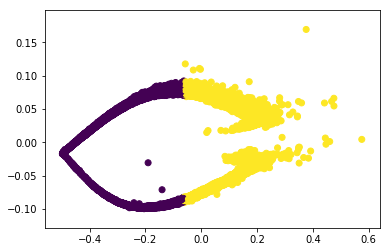

Comparing k-means clusters against the data:
official  4836   4874   5079   5082   5089   5093   5115   5123   5214   \
row_0                                                                     
0             1      2      1      1      1      1      1      1      1   
1             0      0      0      0      0      0      0      0      0   

official  5217   ...    26935  27098  27339  27453  27712  28354  28390  \
row_0            ...                                                      
0             2  ...        0      0      0      0      0      0      0   
1             0  ...        1      1      1      1      1      1      1   

official  28788  32053  32333  
row_0                          
0             0      0      0  
1             1      1      1  

[2 rows x 11030 columns]


In [15]:
# Normalize the data.
X_norm = normalize(marathon)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, time))

In [16]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    marathon,
    time,
    test_size=0.9,
    random_state=42)

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 12


In [18]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

TypeError: unhashable type: 'slice'